<a href="https://colab.research.google.com/github/protoi/Speech-Emotion-Analysis/blob/main/2_Audio_Processing_and_Silence_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIPTION 

Uses the .csv file generated from the previous codes and at the end, generates a new pickle file contains a pandas dataframe(around 3.5 GB) with the audio samples having segments of silences removed.

# LIBRARIES AND IMPORTS

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
import librosa as lib
import librosa.display as lid
import re 
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.playback import play
import os as os
import glob as glob
from pathlib import Path
from os import chdir
from scipy.signal import butter, filtfilt
import gc
from tqdm import tqdm
from google.colab import drive
import shutil
from google.colab import output
import IPython
from IPython.display import Audio
import random as rand
from pylab import Rectangle
import gc 
from scipy import stats
import soundfile as sf
import pyarrow.feather as feather

# LOADING RAW DATA

## KAGGLE

**you need to mount google drive before you run the other commands**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/Machine\ Learning/Speech\ Emotion\ Recognition/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

## SAVEE

_______________________________


***SAVEE***

***LOADING THE DATASET***

In [ ]:
! kaggle datasets download barelydedicated/savee-database

savee-database.zip: Skipping, found more recently modified local copy (use --force to force download)


***UNZIPPING FILES AND REMOVING A REDUNDANT FOLDER***

In [ ]:
if os.path.exists('/content/SAVEE'):
  shutil.rmtree("/content/SAVEE")
!unzip savee-database.zip -d "/content/SAVEE"
shutil.rmtree( "/content/SAVEE/audiodata" , ignore_errors=True)
shutil.rmtree( "/content/savee-database.zip" , ignore_errors=True)

Archive:  savee-database.zip
  inflating: /content/SAVEE/AudioData/DC/a01.wav  
  inflating: /content/SAVEE/AudioData/DC/a02.wav  
  inflating: /content/SAVEE/AudioData/DC/a03.wav  
  inflating: /content/SAVEE/AudioData/DC/a04.wav  
  inflating: /content/SAVEE/AudioData/DC/a05.wav  
  inflating: /content/SAVEE/AudioData/DC/a06.wav  
  inflating: /content/SAVEE/AudioData/DC/a07.wav  
  inflating: /content/SAVEE/AudioData/DC/a08.wav  
  inflating: /content/SAVEE/AudioData/DC/a09.wav  
  inflating: /content/SAVEE/AudioData/DC/a10.wav  
  inflating: /content/SAVEE/AudioData/DC/a11.wav  
  inflating: /content/SAVEE/AudioData/DC/a12.wav  
  inflating: /content/SAVEE/AudioData/DC/a13.wav  
  inflating: /content/SAVEE/AudioData/DC/a14.wav  
  inflating: /content/SAVEE/AudioData/DC/a15.wav  
  inflating: /content/SAVEE/AudioData/DC/d01.wav  
  inflating: /content/SAVEE/AudioData/DC/d02.wav  
  inflating: /content/SAVEE/AudioData/DC/d03.wav  
  inflating: /content/SAVEE/AudioData/DC/d04.wav  
  

## RAVDESS

_____________
***RAVDESS***

***LOADING THE DATASET***

In [ ]:
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio

ravdess-emotional-speech-audio.zip: Skipping, found more recently modified local copy (use --force to force download)


***UNZIPPING THE DATASET***

In [ ]:
if os.path.exists('/content/RAVDESS'):
  shutil.rmtree("/content/RAVDESS")
!unzip ravdess-emotional-speech-audio.zip -d "/content/RAVDESS"
shutil.rmtree( "/content/RAVDESS/audio_speech_actors_01-24" , ignore_errors=True)
shutil.rmtree( "/content/ravdess-emotional-speech-audio.zip" , ignore_errors=True)

Archive:  ravdess-emotional-speech-audio.zip
  inflating: /content/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /content/RAVDESS/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: /content/RAVDESS/A

## TESS

_______________________________


***TESS***

***LOADING THE DATASET***

In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


***UNZIPPING THE DATASET***

In [ ]:
if os.path.exists('/content/TESS'):
  shutil.rmtree("/content/TESS")
!unzip toronto-emotional-speech-set-tess.zip -d "/content/TESS"
shutil.rmtree( "/content/TESS/tess toronto emotional speech set data" , ignore_errors=True)
shutil.rmtree( "/content/toronto-emotional-speech-set-tess.zip" , ignore_errors=True)
# shutil.rmtree( "/content/TESS/tess\ toronto\ emotional\ speech\ set\ data" , ignore_errors=True)

Streaming output truncated to the last 5000 lines.
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/TESS/TESS Toronto emotional speech set data/OAF_angry/OA

## CREMA-D

_______________________________


***CREMA-D***

***LOADING THE DATASET***

In [ ]:
! kaggle datasets download ejlok1/cremad

cremad.zip: Skipping, found more recently modified local copy (use --force to force download)


***UNZIPPING THE DATASET***

In [ ]:
if os.path.exists('/content/CREMAD'):
  shutil.rmtree("/content/CREMAD")
!unzip cremad.zip -d "/content/CREMAD"
shutil.rmtree( "/content/cremad.zip" , ignore_errors=True)

Streaming output truncated to the last 5000 lines.
  inflating: /content/CREMAD/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: /content/CREMAD/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: /content/CREMAD/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: /content/CREMAD/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: /content/CREMAD/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: /content/CREMAD/AudioWAV/1031_IEO_HA

# DESERIALIZING .csv FILE

## READING THE CSV FILE TO FORM A PANDAS DATAFRAME

In [ ]:
!cp /content/drive/MyDrive/Machine\ Learning/Speech\ Emotion\ Recognition/path_list.csv /content/path_list.csv
df = pd.read_csv("/content/path_list.csv")

# VISUALIZATION OF DATA

### HELPER FUNCTIONS

In [ ]:
#obtaining the spectrogram
def getSpectroData(toBePlotted):
    filtered_data_stft = np.abs(lib.stft(toBePlotted)) #Short time Fourier Transform
    filtered_data_stft_db = lib.amplitude_to_db(
        filtered_data_stft,
        ref=np.max
    )
    return filtered_data_stft_db

#butterworth bandpass filter
def butterworth_bandpass_filter(lowcutoff, highcutoff, sr, order = 2):
    nyquistFreq = 0.5 * sr
    low_normal_cutoff = lowcutoff / nyquistFreq
    high_normal_cutoff = highcutoff / nyquistFreq
    b, a = butter(
        order,
        [low_normal_cutoff, high_normal_cutoff],
        btype='band' 
    )
    return b, a


# filtering the signal
def filter_signal(originalSignal, cutoff_freq, sr, filterType= 'bandpass', order=2):
    if filterType.lower() == 'bandpass':
        assert type(cutoff_freq) == list or np.array, 'enter frequencies as a list'
        b, a = butterworth_bandpass_filter(cutoff_freq[0], cutoff_freq[1], sr, order= order)
    filtered_data = filtfilt(b, a, originalSignal)
    return filtered_data

def invoke_bandpass(data, sampling_rate):
    order_of_filter = 6
    filtered_data = filter_signal(
        data,
        [128, 8192],
        sampling_rate,
        filterType='bandpass',
        order=order_of_filter
    )
    return filtered_data

## PLOTTING THE AUDIO FILE (dont run this use the funtion below)

### DONT RUN THESE

(117189,)
median amplitude: 0.051727294921875
mean amplitude: 0.10510246455669403
max amplitude: 0.91656494140625


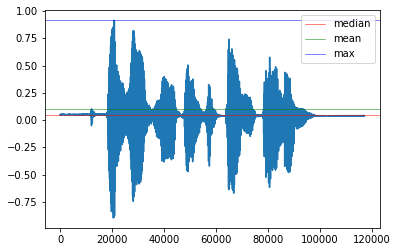

In [ ]:

def iterate_over_dataframe(mydf):
  mean_len = 0
  counter = 0
  lengths=[]
  for index, row in mydf.iterrows():
    print(row['path'])
    X, sample_rate = lib.load(row['path'], res_type = 'kaiser_fast', sr = 44100)
    lengths.append(lib.get_duration(y=X, sr=sample_rate))
    if counter == 5:
      break
    counter += 1
  print(lengths)

def check_one_audio(mydf):
  
  X, sample_rate = lib.load(mydf.iloc[10]['path'], res_type = "kaiser_fast", sr = 44100)
  print(np.shape(X))

  median_amp = np.median(np.absolute(X))
  print(f"median amplitude: {median_amp}")
  mean_amp = np.mean(np.absolute(X))
  print(f"mean amplitude: {mean_amp}")
  # mode_amp = stats.mode(np.absolute(X)).mode[0]
  # print(f"mode amplitude: {mode_amp}")
  max_amp = np.max(np.absolute(X))  
  print(f"max amplitude: {max_amp}")
  
  # plt.plot(X)
  plt.plot(X)

  plt.axhline(median_amp, color="r", linestyle="-", linewidth=0.5,  label="median")
  plt.axhline(mean_amp, color="g", linestyle="-", linewidth=0.5,  label="mean")
  # plt.axhline(mode_amp, color="y", linestyle="-", linewidth=0.5,  label="mode")
  plt.axhline(max_amp, color="b", linestyle="-", linewidth=0.5,  label="max")
  plt.legend(loc="upper right")


  sf.write('stereo_file.wav', X, sample_rate, subtype='PCM_24')
  
# iterate_over_dataframe(df)
check_one_audio(df)

In [ ]:
from IPython.display import Audio
from IPython.display import display

def fix_audio(mydf):
  X, sample_rate = lib.load(mydf.iloc[2748]['path'], res_type = "kaiser_fast", sr = 44100)
  print(np.shape(X))

  sf.write('myaudio.wav', X, sample_rate, subtype='PCM_24')
  sound_file = 'myaudio.wav'
  wn = Audio(sound_file, autoplay=True) ##
  display(wn)
fix_audio(df)

(105876,)


### REMOVE BLANK WINDOWS FROM THE AUDIO FILE

In [ ]:
%%time
###removes parts of the array where value < threshold for a window of size > window_size
def remove_lack_of_sound(raw_audio_samples):
  
  window = 3000 # if 3000 consecutive element have value < threshold, that window gets rejected
  threshold = np.mean(np.absolute(raw_audio_samples))

  buffer_list = []
  output_list = []

  for element in raw_audio_samples:
    if (element > threshold):
      if (len(buffer_list) < window):
        output_list.extend(buffer_list)
      buffer_list.clear()
      output_list.append(element)
    else:
      buffer_list.append(element)
  
  return np.array(output_list)

def extract_audio_from_path(file_path):
  audio_samples, sampling_rate = lib.load(file_path, res_type = "kaiser_fast", sr = 44100)
  return audio_samples

def audio_cleaning(numpy_array: np.array) -> np.array:

  audio_samples = np.array(list(map(extract_audio_from_path, numpy_array)), dtype = object)
  cleared_audio_samples = np.array(list(map(remove_lack_of_sound, audio_samples)), dtype = object)

  return cleared_audio_samples

df_copied = df.head(200).copy(deep = True)
# df_copied = df.copy(deep = True)
df_copied['silence_removed'] = audio_cleaning(df_copied['path'].values)
df_copied.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           200 non-null    object
 1   source           200 non-null    object
 2   path             200 non-null    object
 3   name             200 non-null    object
 4   silence_removed  200 non-null    object
dtypes: object(5)
memory usage: 70.9 MB
CPU times: user 8.46 s, sys: 492 ms, total: 8.95 s
Wall time: 9.36 s


### PLAYING A RANDOM AUDIO FILE (SILENCE REMOVED AND ORIGINAL) FOR COMPARISON

In [ ]:
#save
import time
randNum = 100
sf.write('name.wav', df_copied['silence_removed'][randNum], 44100, subtype='PCM_24')

#playback
wn = Audio('name.wav', autoplay = True)
display(wn)

time.sleep(4)
wn2 = Audio(df_copied['path'][randNum], autoplay = True)
display(wn2)

### SERIALIZING THE PANDAS DATAFRAME DIRECTLY TO GOOGLE DRIVE

In [ ]:
pd.to_pickle(df_copied, '/content/drive/MyDrive/Machine Learning/Speech Emotion Recognition/audio_without_silence.pkl')
# read_df = pd.read_pickle('/content/drive/MyDrive/Machine Learning/Speech Emotion Recognition/audio_without_silence.pkl')
# read_df

,labels,source,path,name,silence_removed
0,male_anger,SAVEE,/content/SAVEE/AudioData/DC/a01.wav,DC_a01,"[0.112091064, 0.11282349, 0.088012695, 0.05386..."
1,male_anger,SAVEE,/content/SAVEE/AudioData/DC/a02.wav,DC_a02,"[0.10910034, 0.11364746, 0.10357666, 0.0806579..."
2,male_anger,SAVEE,/content/SAVEE/AudioData/DC/a03.wav,DC_a03,"[0.12271118, 0.123931885, 0.1251831, 0.1264648..."
3,male_anger,SAVEE,/content/SAVEE/AudioData/DC/a04.wav,DC_a04,"[0.12472534, 0.13046265, 0.13531494, 0.1396484..."
4,male_anger,SAVEE,/content/SAVEE/AudioData/DC/a05.wav,DC_a05,"[0.121795654, 0.1227417, 0.11932373, 0.1135559..."
...,...,...,...,...,...
12157,female_disgust,CREMAD,/content/CREMAD/AudioWAV/1091_WSI_DIS_XX.wav,1091_WSI_DIS_XX,"[0.0009117986, 0.0011943923, 0.0013480312, 0.0..."
12158,female_fear,CREMAD,/content/CREMAD/AudioWAV/1091_WSI_FEA_XX.wav,1091_WSI_FEA_XX,"[-0.0065059913, -0.007563202, -0.0075736893, -..."
12159,female_happy,CREMAD,/content/CREMAD/AudioWAV/1091_WSI_HAP_XX.wav,1091_WSI_HAP_XX,"[0.011431874, 0.011645955, 0.011703809, 0.0115..."
12160,female_neutral,CREMAD,/content/CREMAD/AudioWAV/1091_WSI_NEU_XX.wav,1091_WSI_NEU_XX,"[0.008490561, 0.00867801, 0.008760293, 0.00883..."


### STATISTICS FOR THE AUDIO SEGMENTS WITH SILENCES REMOVED

In [ ]:
numN = df_copied['silence_removed'].values
np.shape(numN)
length_of_audios = np.array([len(i) for i in numN])
print(np.mean(length_of_audios))
print(np.median(length_of_audios))
print(stats.mode(length_of_audios).mode[0])
print(np.std(length_of_audios))

92790.88
87206.5
39306
30316.9016335047


In [ ]:
#os.path.getsize("/content/audio_without_silence.pkl") # just to check the size of a file

# !pwd
# !zip -r Spectrograms.zip /content/spectros/*.png

3774727110